# **Step 0: Importing and Reading Data****

We read the csv file using Pandas into a dataframe called df

In [4]:
df=pd.read_csv("/kaggle/input/ragnarok-sports/sports.csv")
new_df=pd.read_csv("/kaggle/input/ragnarok-sports/sports.csv")
df.head(5)

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50


# **Step 1:Data Understanding****

1.df.shape- Gives the order of the dataframe

2.df.dtypes- Gives data types of values stored in resp. columns

3.df.describe- Describes the data stored(sum,mean,25%,50%...)

4.df.columns- Gives the names of columns

In [5]:
df.shape

(7582, 19)

In [6]:
df.dtypes

event               object
date                object
location            object
r_fighter           object
b_fighter           object
status              object
r_kd               float64
b_kd               float64
r_str              float64
b_str              float64
r_td               float64
b_td               float64
r_sub              float64
b_sub              float64
weight_class        object
method              object
method_detailed     object
round              float64
time                object
dtype: object

In [7]:
df.describe()

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,round
count,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7497.000000
mean,0.368914,0.061798,43.488630,28.766988,1.461343,0.668539,0.534243,0.247057,2.342804
std,0.607262,0.264120,34.591414,27.099495,1.988927,1.195232,0.941658,0.684925,1.015948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,36.000000,22.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,61.000000,42.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,3.000000,445.000000,271.000000,21.000000,11.000000,10.000000,7.000000,5.000000


In [8]:
df.columns

Index(['event', 'date', 'location', 'r_fighter', 'b_fighter', 'status', 'r_kd',
       'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub',
       'weight_class', 'method', 'method_detailed', 'round', 'time'],
      dtype='object')

# **Step 2: Data Preparation****
1.Dropping irrelevant columns and rows

2.Identifying duplicated columns

3.Renaming Columns

4.Feature Creation

5. Creating new columns

**Here we create a new column Total_pts which is the sum of all individual points**

In [9]:

new_df["Total_pts"]=df["r_kd"]+df["b_kd"]+df["r_str"]+df["b_str"]+df["r_td"]+df["b_td"]+df["r_sub"]+df["b_sub"]
new_df.head(5)


,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time,Total_pts
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00,181.0
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00,69.0
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33,44.0
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21,111.0
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50,47.0


**We are changing the column names to a specific format** 

In [10]:

new_df=new_df.rename(columns={'event':"Event", 'r_fighter':"R_fighter","location":"Location", 'b_fighter':"B_fighter", 'status':"Status",
       
       'weight_class':"Weight_class", 'method':"Method", 'method_detailed':"Method_details", 'round':"Round", 'time':"Match_time"})
new_df.head(5)

,Event,date,Location,R_fighter,B_fighter,Status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,Weight_class,Method,Method_details,Round,Match_time,Total_pts
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00,181.0
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00,69.0
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33,44.0
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21,111.0
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50,47.0


**Here we are omitting the unwanted columns by commenting them out in the new df**

I decided to drop the individual points  columns as I added a corresponding Total_pts column 
Also i deleted Date column as its irrevelant in the context of the matches

In [11]:

new_df=new_df[['Event', #'date', 
               'Location', 'R_fighter', 'B_fighter', 'Status', "Total_pts",
               #'r_kd','b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub',
       'Weight_class', 'Method', 'Round', 'Match_time']]
new_df.head(5)

,Event,Location,R_fighter,B_fighter,Status,Total_pts,Weight_class,Method,Round,Match_time
0,UFC Fight Night: Ribas vs. Namajunas,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,181.0,Women's Flyweight,U-DEC,5.0,5:00
1,UFC Fight Night: Ribas vs. Namajunas,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,69.0,Heavyweight,U-DEC,3.0,5:00
2,UFC Fight Night: Ribas vs. Namajunas,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,44.0,Middleweight,KO/TKO,1.0,4:33
3,UFC Fight Night: Ribas vs. Namajunas,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,111.0,Bantamweight,KO/TKO,2.0,0:21
4,UFC Fight Night: Ribas vs. Namajunas,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,47.0,Featherweight,SUB,2.0,1:50


**Here we are checking which columns have NaN entries and selectively dropping off those columns**

Also printing new order of the data frame

In [12]:
columns_to_check = ['Event', 'R_fighter', 'B_fighter', 'Location','Status','Total_pts','Method']
new_df.dropna(subset=columns_to_check, inplace=True)

new_df.shape

(7476, 10)

# # **Step 3: Feature Understanding & Graph Plotting****

 **GRAPHS -** 
 
  1.Bar
 
  2.Pie
 
 3.Scatter
 
 4.Pairplot
  
  5.3D
  
  6.KDE
  
  7.Histogram
  
  8.Line
  
  9.Heatmaps
  
 10.Images***

**Can we show the top 10 Locations in which UFC Fights were held?**

1. **Locations**: The graph displays data for the following ten destinations:
   - [Montreal,Boston,Toronto,New York City.Newark,Houston,Anaheim,London,Abu Dhabi,Las Vegas]

2. **Bars**: Each bar represents the **number of fights** to the corresponding location. The bars are colored **purple**.

3. **Insights**: This graph provides insights into UFC fights, showing which destinations are popular based on the volume of fights.



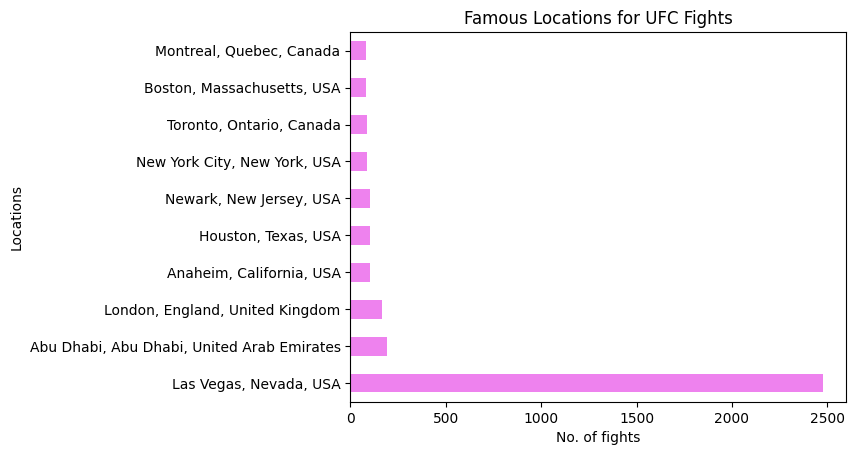

In [13]:
ax = new_df['Location'].value_counts() \
    .head(10) \
    .plot(kind ='barh', title = 'Famous Locations for UFC Fights', color='violet')
ax.set_xlabel('No. of fights',color='black')
ax.set_ylabel('Locations',color='black')
pl.xticks(rotation=0)
pl.show()

**Can we plot a graph showing number of fights conducted in each weight class ?**

1.. **Weight Classes**:
   - The graph represents the distribution of fighters across different **weight classes**.

2.. **Observations**:
   - The **Lightweight** class appears to have the **highest number of fighters**.
   - Other weight classes, such as **Middleweight**, **Welterweight**, and **Featherweight**, also contribute fighters.

3.. **Insights**:
   - The graph provides insights into the **popularity** or **commonality** of each weight class.
  




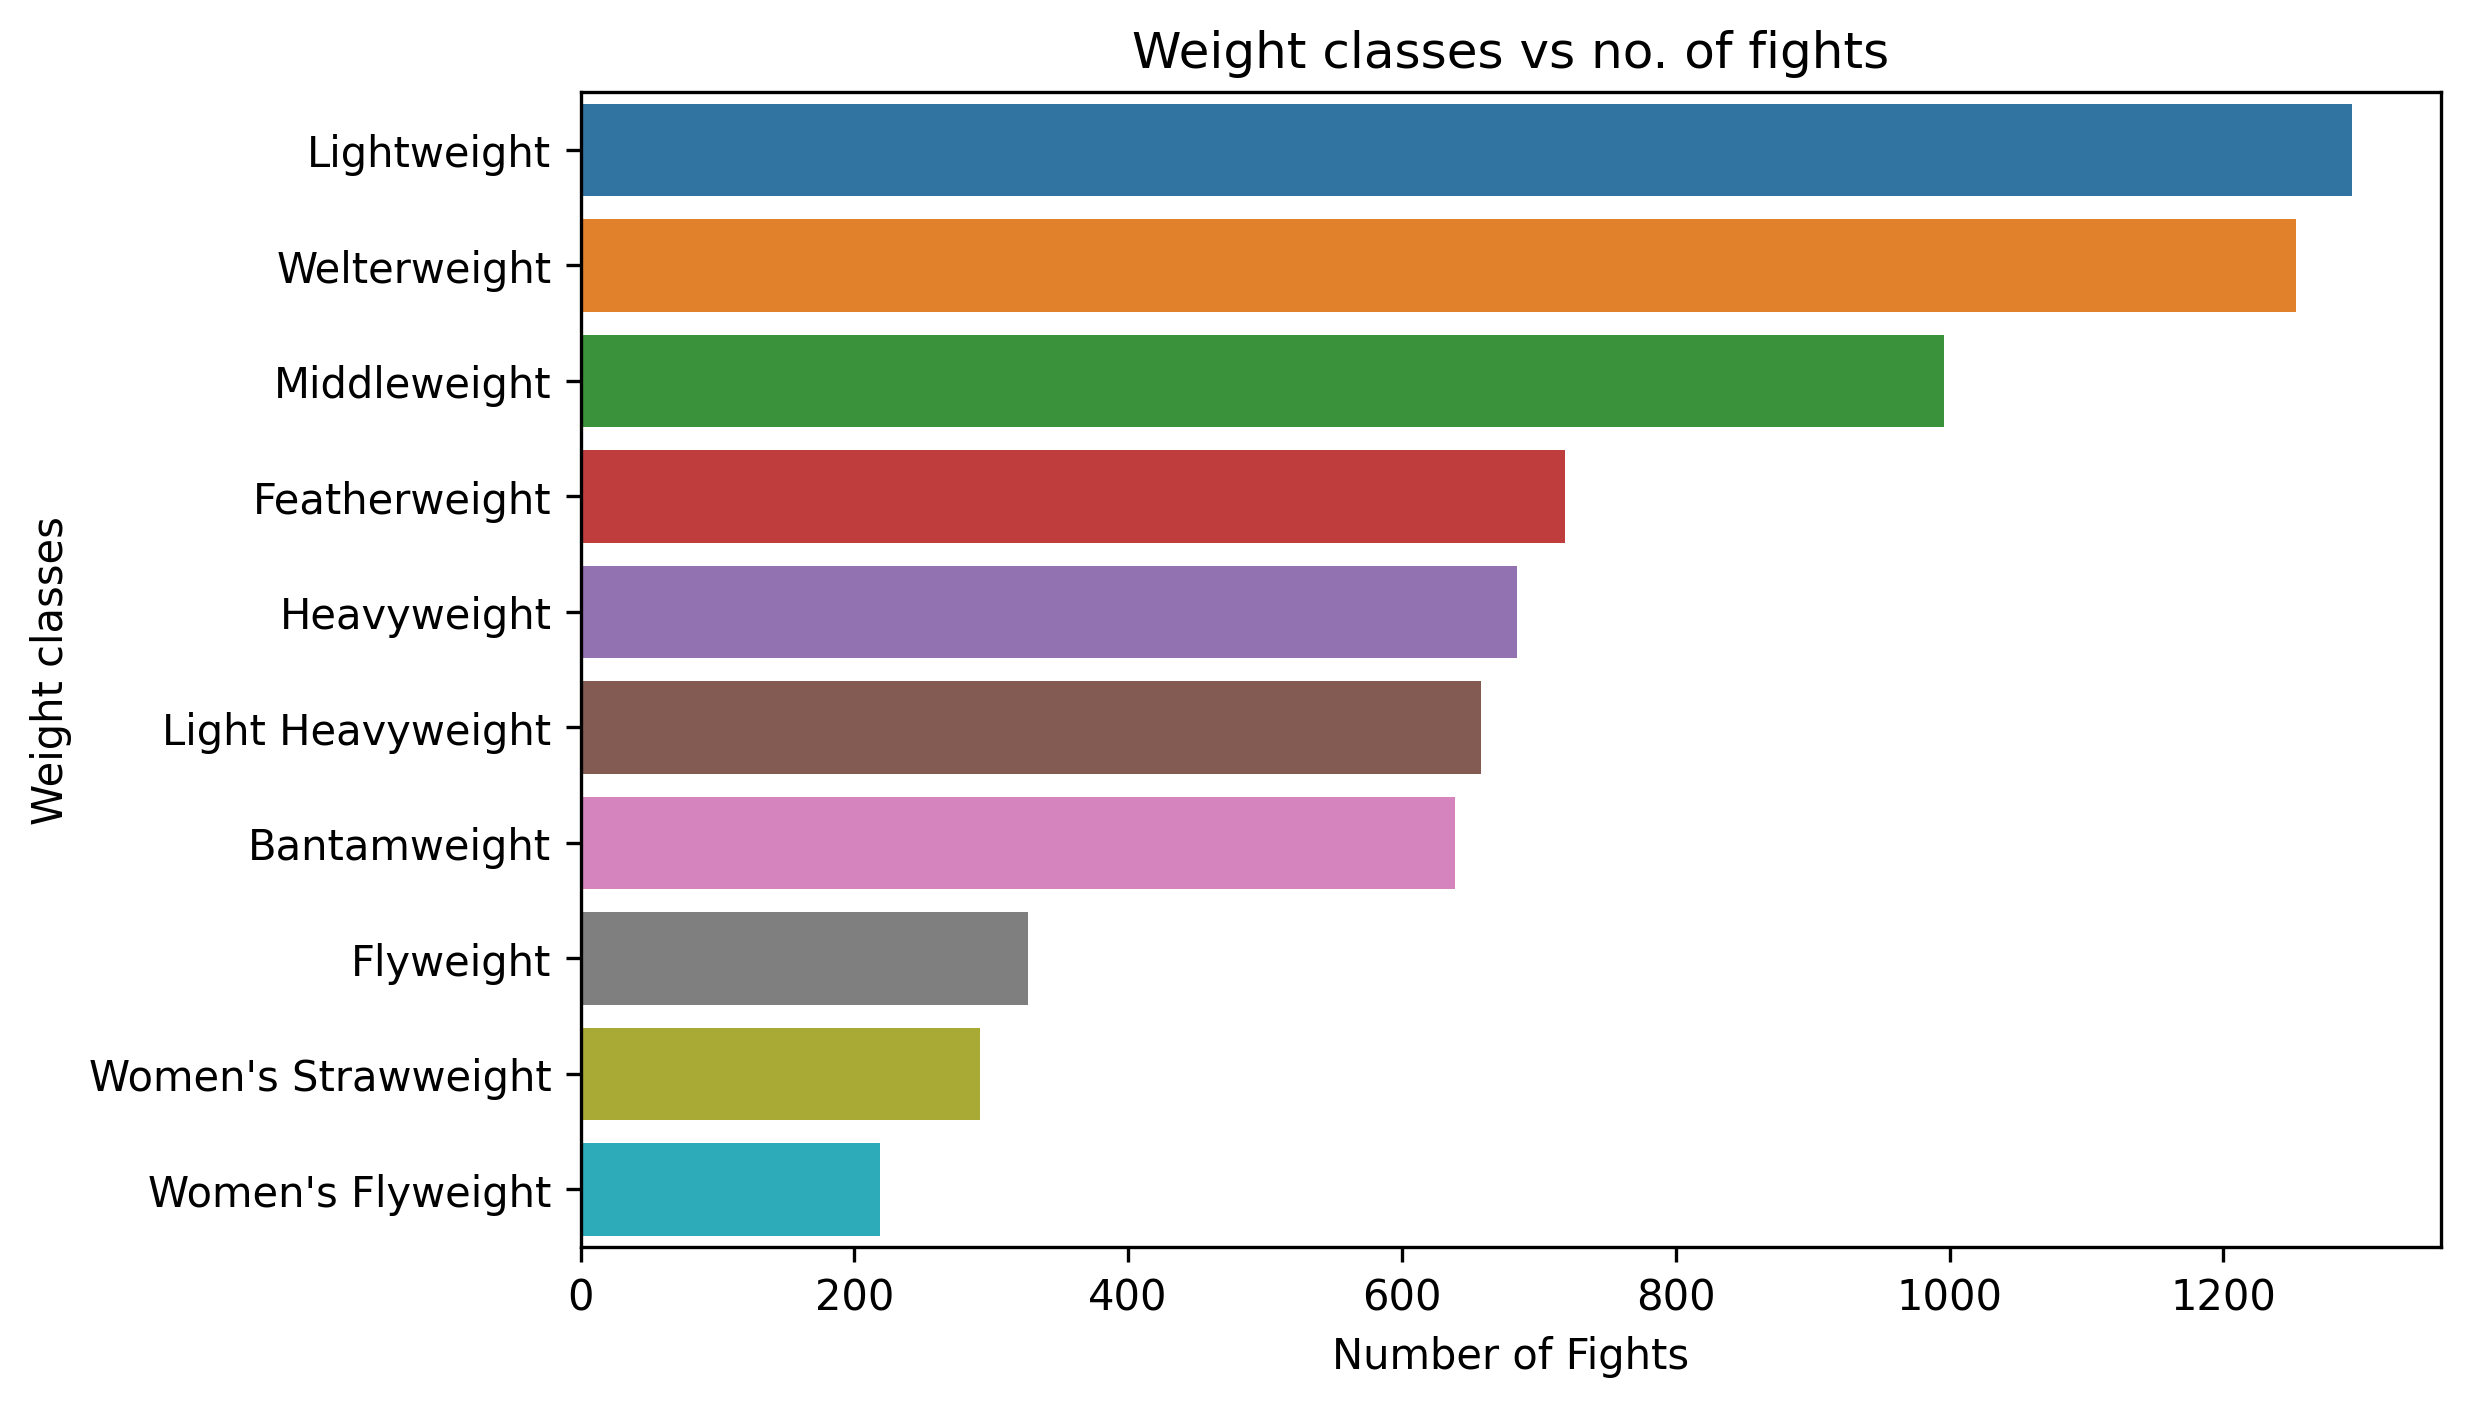

In [14]:
weights = new_df['Weight_class'].value_counts().head(10)
pl.figure(figsize=(8,5),dpi=300)
sb.barplot(x=weights.values, y=weights.index)
pl.title('Weight classes vs no. of fights',color='black')
pl.xlabel('Number of Fights',color='black')
pl.ylabel('Weight classes',color='black')
pl.show()

**Can we show the number of fighter included in each weight class?**

**Insights**: We see that **Lightweight,Welterweight,MidddleWeight** contain the most number of fighters respectively

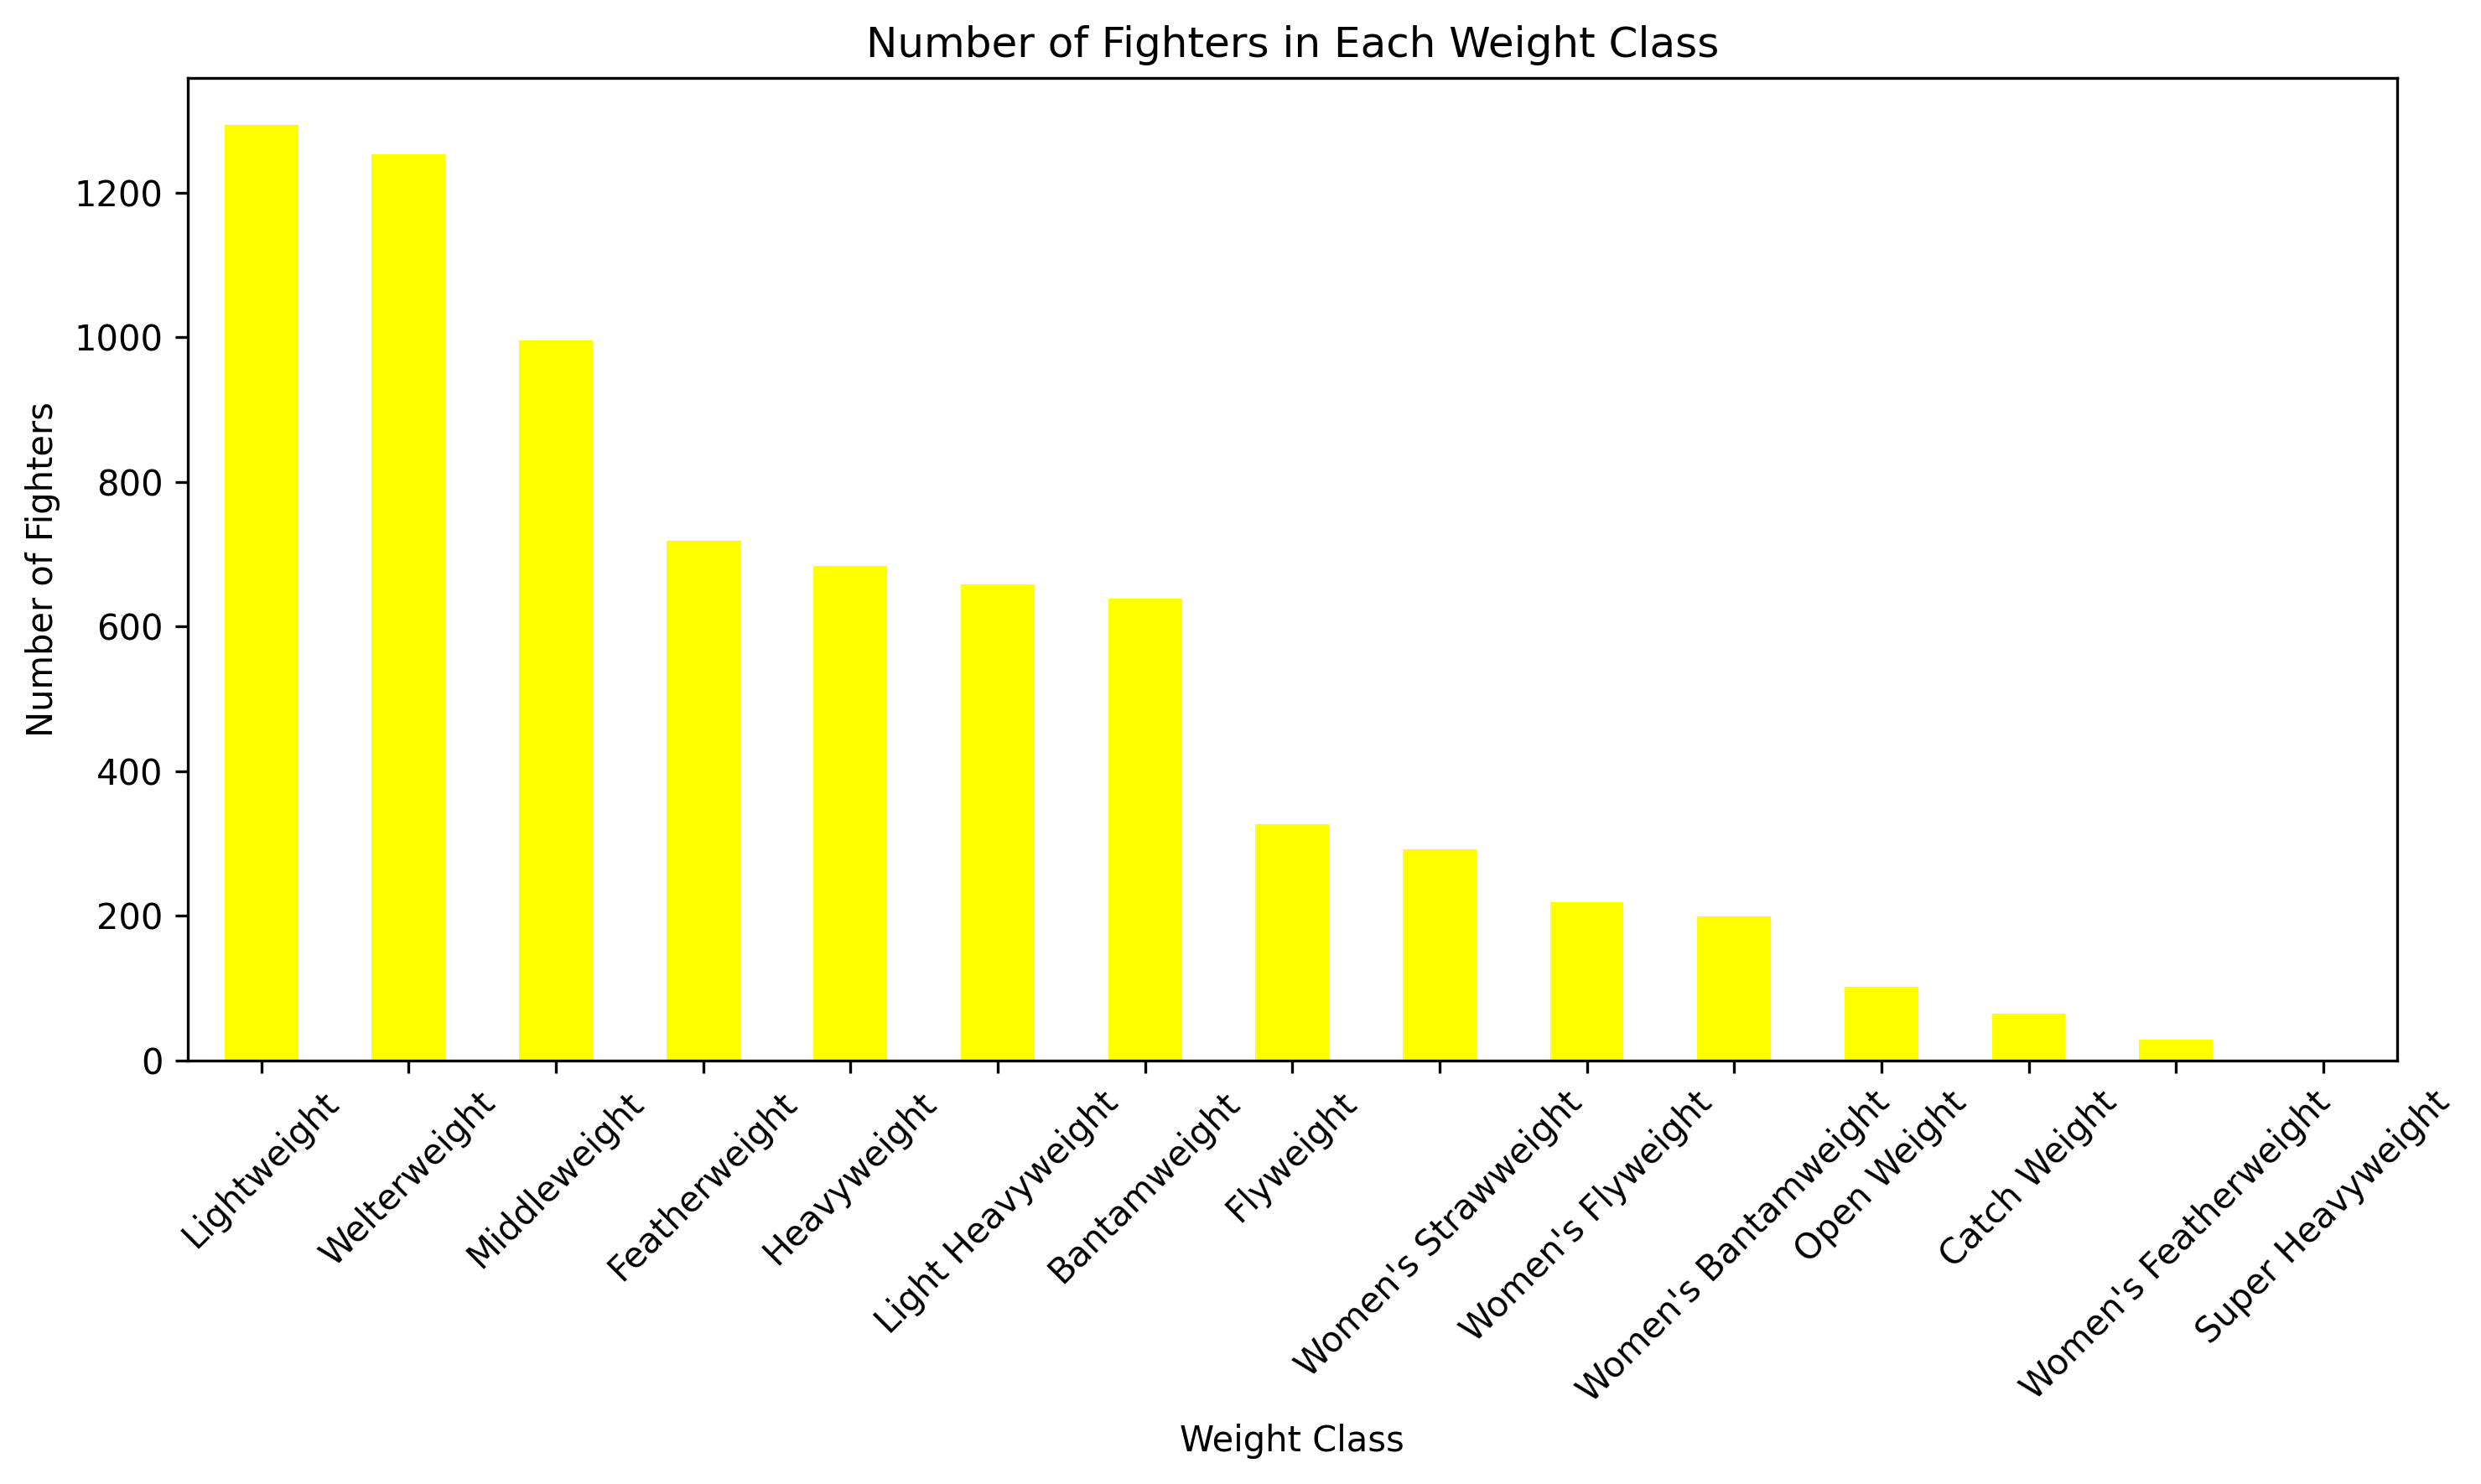

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of fighters in each weight class
weight_class_counts = new_df['Weight_class'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6),dpi=300)
weight_class_counts.plot(kind='bar', color='yellow')
plt.title('Number of Fighters in Each Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**Can we plot a graph showing the percentage number of wins and losses/draws?**


1. **Fight Outcomes**:
   - The pie chart represents the distribution of outcomes in **UFC fights**.
   - Status=win means the red fighter has on the match

2. **Insights**:
   - **Winning Dominance**: The overwhelming majority of UFC fights result in a **clear winner**. Fighters strive for decisive victories.
   - **Rare Draws**: Draws are relatively **rare in MMA**, making up only a tiny fraction of all fights.
   - **Unfinished Fights**:  The small slice for "fight was not properly finished" indicates that some fights may have been stopped due to injuries, disqualifications, or other reasons without a conclusive outcome. Hence i decided to ignore this for proper clarity of the plot



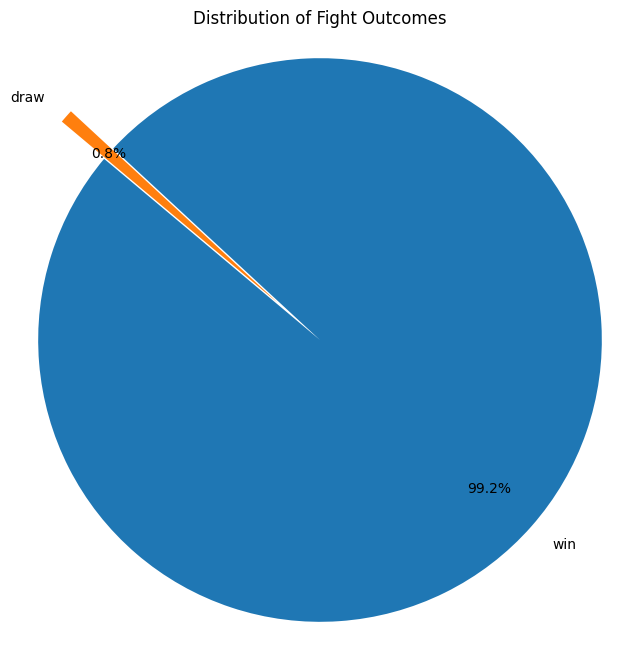

In [16]:

outcome_counts = new_df['Status'].value_counts()

# Create the pie chart
pl.figure(figsize=(8, 8))
explode=(0.1,0.1)
pl.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%',pctdistance=0.8, startangle=140,explode=explode)
pl.title('Distribution of Fight Outcomes')
pl.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()


**Can we show the percentage number of all methods used during fights?**

1. **Winning Methods**:
   - The pie chart breaks down the **percentage distribution** of various methods used by fighters to secure victories in UFC fights.
   - Each segment represents a specific method.

3. **Insights**:
   - **KO Dominance**: The largest segment is **"Knockout"**, indicating that this method is the most common way fights end decisively.
   - **Submission Skills**: The **"Submission"** segment highlights the importance of ground game and grappling expertise.
   - **Judges' Decisions**: The **"Decision"** slice represents fights that go to the scorecards, emphasizing the role of judges in determining winners.
   - **Rare Occurrences**: TKOs and other methods are less frequent but still contribute to fight outcomes.



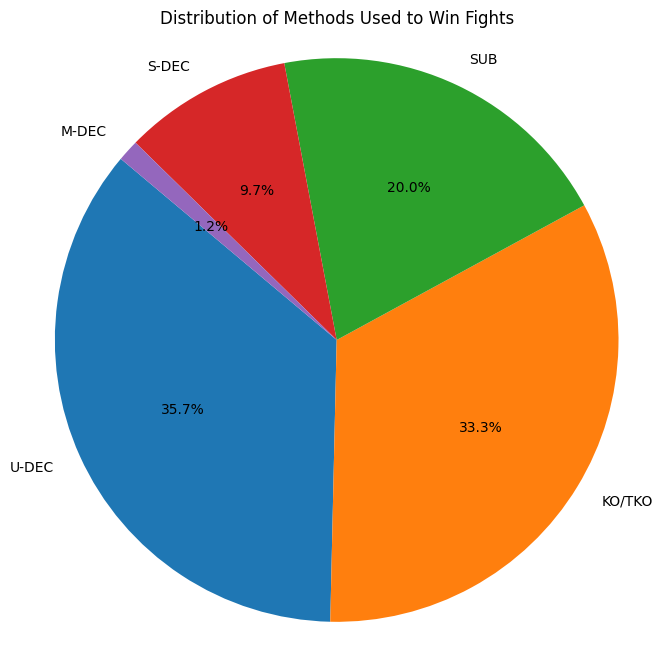

In [17]:

method_counts = new_df['Method'].value_counts().head(5)

# Create the pie chart
pl.figure(figsize=(8, 8))
#explode=(.2,.1,.1,.1,.1)
pl.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%', startangle=140) 
pl.title('Distribution of Methods Used to Win Fights')
pl.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()


**Can we create a plot showing the total points earned by the fighter in each round and aslo sort these based on the outcome of the fight?**

1. **Scatter Plot Overview**:
   - The x-axis represents the **number of rounds** in a fight (ranging from 1.0 to 5.0).
   - The y-axis represents the **total points** earned by fighters (ranging from 0 to 600).
    -Sorted on basis of the Outcome by using different colors

3. **Patterns and Insights**:
   - **Winning Clusters**: Most fights resulted in a win, as indicated by the abundance of green dots.
   - **Unfinished Fights**: The red dots, clustered mainly around rounds 3.0 and 4.0 represent fights that were not properly finished.
   - **Draws**: The blue dots are relatively sparse, suggesting that draws are less common.




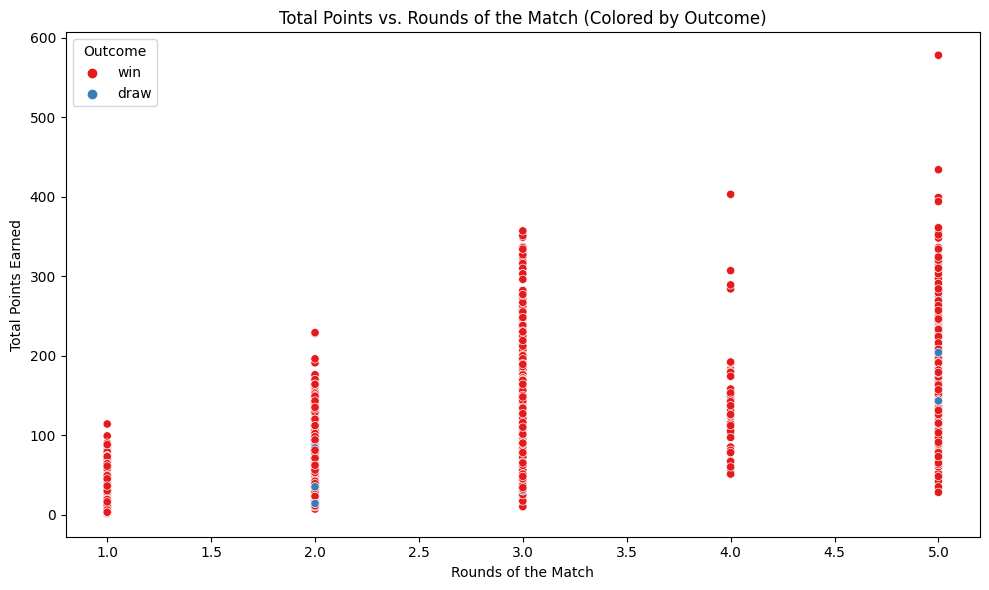

In [18]:


# Create a scatter plot of total points vs. rounds of the match with hue based on fight outcome
pl.figure(figsize=(10, 6))
sb.scatterplot(data=new_df, x='Round', y='Total_pts', hue='Status', palette='Set1')
pl.xlabel('Rounds of the Match')
pl.ylabel('Total Points Earned')
pl.title('Total Points vs. Rounds of the Match (Colored by Outcome)')
pl.legend(title='Outcome')
pl.tight_layout()
pl.show()


**Can we display how densely/scarcely total points are distributed ?**

**# **A Histogram made by using Seaborn ****:-**

This plot shows the graph of **Density of Total points vs Total points **


1. **X-Axis (Total points of the match)**:
   - The x-axis represents the **number of Points** in a fight.
   - The values range from **0** to **600**.

2. **Y-Axis (Density)**:
   - The y-axis represents the ** density of total points** earned by fighters.
   - The scale ranges from **0** to **1200**.
   
3. **Insights:** We see that the Density of points >200 is very low and conitnuously decreases   



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


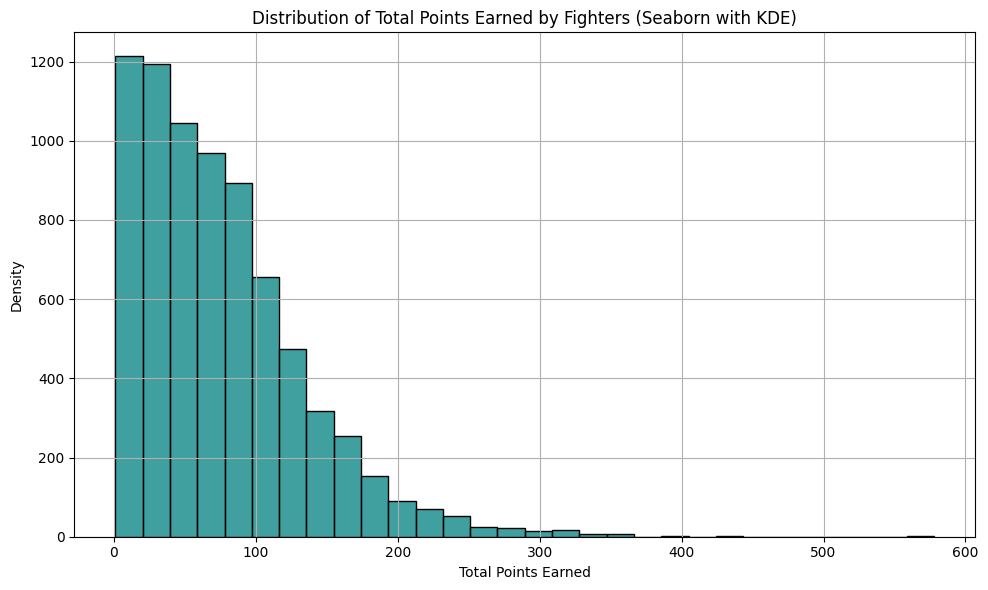

In [19]:
pl.figure(figsize=(10, 6))
sb.histplot(new_df['Total_pts'], bins=30, edgecolor='black',color='teal',
             kde_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})
pl.xlabel('Total Points Earned')
pl.ylabel('Density')
pl.title('Distribution of Total Points Earned by Fighters (Seaborn with KDE)')
pl.grid(True)
pl.tight_layout()
pl.show()




**Can we show the total points distribution in each weight class?**

1. **Boxplot Overview**:
   - The image displays a **boxplot graph**.
   - The y-axis  represents the **total points** earned by fighters.
   - The x-axis  corresponds to different **weight classes**.
2. **Weight Classes Insights**:
   - The boxplot allows us to compare the spread of total points across different weight classes.
   - We can identify which weight classes have:
     - **Higher median points**: The box's position indicates the median (50th percentile) points.
     - **Greater variability**: Wider boxes or longer whiskers suggest more variability in points.
     - **Potential outliers**: Any data points beyond the whiskers may be outliers.

3. **Insights**:
   - Fighters in certain weight classes consistently earn more points (higher median).
   - Weight classes with wider boxes or longer whiskers may have greater variation in performance.


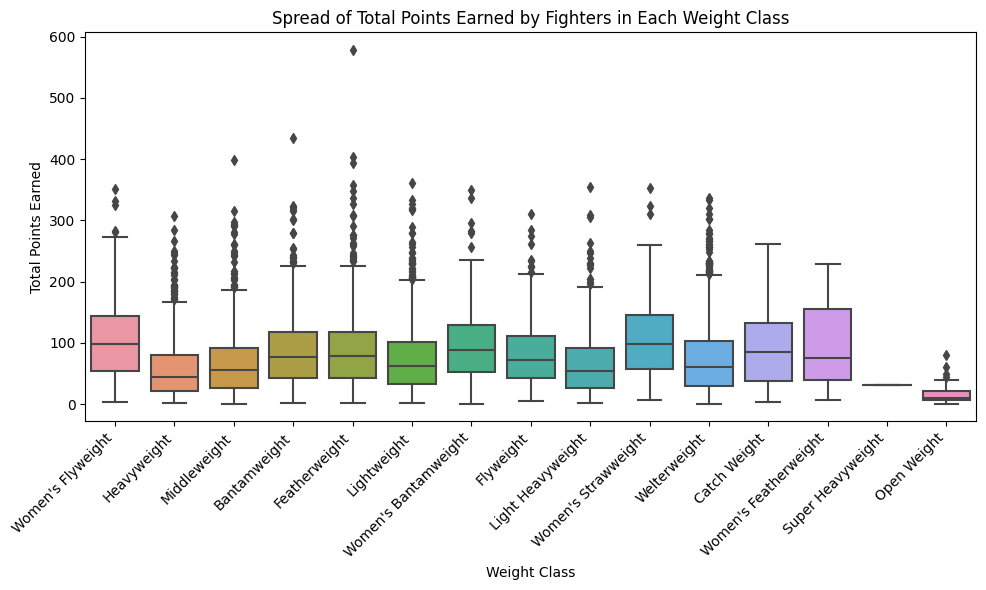

In [20]:
pl.figure(figsize=(10, 6))
sb.boxplot(x='Weight_class', y='Total_pts', data=new_df)
pl.xlabel('Weight Class')
pl.ylabel('Total Points Earned')
pl.title('Spread of Total Points Earned by Fighters in Each Weight Class')
pl.xticks(rotation=45, ha='right')
pl.tight_layout()
pl.show()


**Can we show the most common and least used methods in the fights?**

1. **Graph Overview**:
   - The bar graph displays the **frequency** of different methods used by fighters to win UFC fights.
   
 2. **Methods and Frequencies**:
   - The graph likely includes bars for the following methods:
     - **Knockout (KO)**: Fighters deliver powerful strikes to render opponents unconscious.
     - **Submission**: Grappling techniques force opponents to tap out due to joint locks or chokeholds.
     - **Decision**: Judges determine the winner based on scoring criteria.
     - **Technical Knockout (TKO)**: Referees stop fights due to one-sided dominance or fighter's inability to defend.
     - **Other**: This category may include rare methods like disqualifications or forfeits.

3. **Insights**:
   - The tallest bar indicates the most common method.
   - The distribution across methods reveals fighter preferences and fight dynamics.


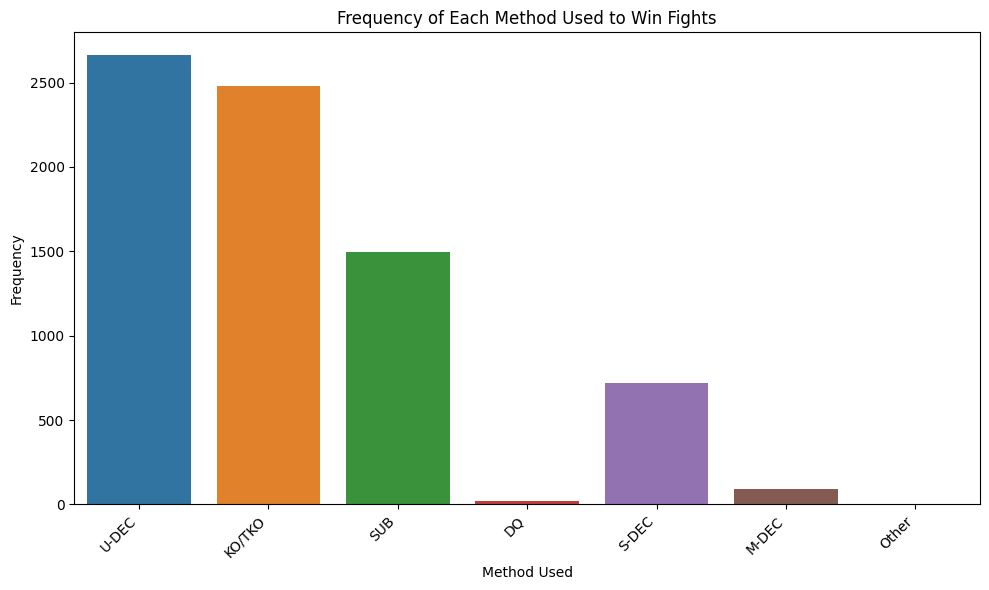

In [21]:
pl.figure(figsize=(10, 6))
sb.countplot(x='Method', data=new_df)
pl.xlabel('Method Used')
pl.ylabel('Frequency')
pl.title('Frequency of Each Method Used to Win Fights')
pl.xticks(rotation=45, ha='right')
pl.tight_layout()
pl.show()


***# Assumption :#***

we define the **perforance of a player P**= k(Total _pts)
as performance is directly proportional to points scored in the match
k=100/578=0.173
Performance ranges from [0,100]
Hence we introduce a new column called as Performance in the data frame

In [22]:
new_df['Performance']=100*new_df['Total_pts']/578
new_df=new_df.sort_values("Total_pts",ascending=False)
new_df.head(5)

,Event,Location,R_fighter,B_fighter,Status,Total_pts,Weight_class,Method,Round,Match_time,Performance
1633,UFC Fight Night: Holloway vs. Kattar,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Max Holloway,Calvin Kattar,win,578.0,Featherweight,U-DEC,5.0,5:00,100.000000
971,UFC Fight Night: Font vs. Vera,"Las Vegas, Nevada, USA",Marlon Vera,Rob Font,win,434.0,Bantamweight,U-DEC,5.0,5:00,75.086505
2627,UFC 231: Holloway vs. Ortega,"Toronto, Ontario, Canada",Max Holloway,Brian Ortega,win,403.0,Featherweight,KO/TKO,4.0,5:00,69.723183
393,UFC Fight Night: Vettori vs. Cannonier,"Las Vegas, Nevada, USA",Jared Cannonier,Marvin Vettori,win,399.0,Middleweight,U-DEC,5.0,5:00,69.031142
1192,UFC Fight Night: Holloway vs. Rodriguez,"Las Vegas, Nevada, USA",Max Holloway,Yair Rodriguez,win,394.0,Featherweight,U-DEC,5.0,5:00,68.166090


**Can we show the distribution of Total points for each weight class sorted on the basis of the performance of the player ?
**
1. **Scatter Plot Overview**:
   - The scatter plot visualizes the **variance of performance** across different **weight classes**.
   - Each data point represents a specific weight class.
   - The y-axis  corresponds to the **weight class** (e.g., lightweight, middleweight, etc.).
   - The hue parameter represents a performance metric (e.g., total points earned by fighters).

2. **Performance Variance Insights**:
   - The spread of data points reveals how much performance varies within each weight class.
   - Weight classes with **tight clusters** have less variance, while those with **widely scattered points** exhibit greater variability.
   



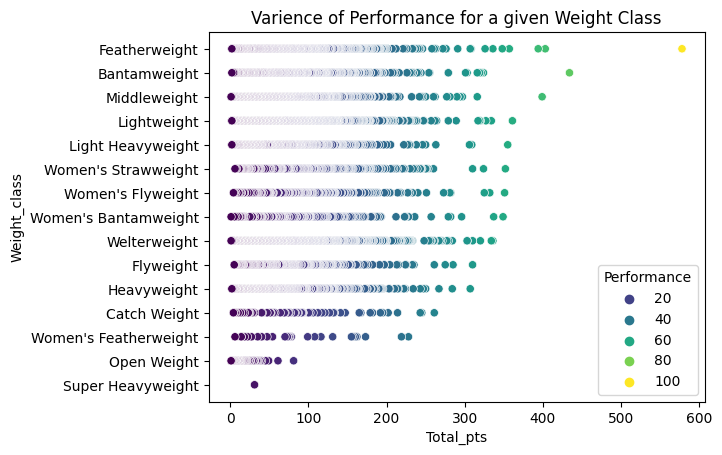

In [24]:
ax = sb.scatterplot(x='Total_pts',
                y='Weight_class',
                hue='Performance',
                 palette='viridis',
                data=new_df)
ax.set_title('Varience of Performance for a given Weight Class')
pl.show()

**Can we show the distribution of average total points for a specific weight class based on the total fights conducted in that weight class?**

1. **Scatter Plot Overview**:
   - The scatter plot visualizes the **average total points** across different **weight classes**.
   - Each data point represents the average total points for a weight class.
   - The hue parameter represents a weight class  metric 

2. **Performance Variance Insights**:
   - We see that average total points is highest for the **Bantmweight** while its lowest for the **Catchweight** classes
   - We see that the average total points lie around 100 for total fights between 10-20 . Also we conclude that most weight classesonly conduct upto 30 fights and very few weight classes conduct more than 30 matches
   




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Drop rows with NaN values in specified columns
columns_to_check = ['Event', 'R_fighter', 'B_fighter', 'Location', 'Total_pts', 'Weight_class']
new_df = new_df.dropna(subset=columns_to_check)



# Calculate the number of fights for each fighter
new_df['Total_fights'] = new_df.groupby('R_fighter')['R_fighter'].transform('count') + new_df.groupby('B_fighter')['B_fighter'].transform('count')

# Extract weight class
#new_df['Weight_class'] = new_df['Weight_class'].str.extract(r'(\d+)').astype(float)

# Group by weight class and experience, calculate mean Total_pts and win percentage
grouped = new_df.groupby(['Weight_class', 'Total_fights']).agg({'Total_pts': 'mean', 'Status': lambda x: (x == 'win').mean()}).reset_index()

# Plotting
plt.figure(figsize=(8, 5),dpi=600)
sns.scatterplot(data=grouped, x='Total_fights', y='Total_pts', hue='Weight_class', sizes=(50, 200))
plt.title('Fighter Performance by Weight Class and Experience')
plt.xlabel('Total Fights')
plt.ylabel('Average Total Points')
plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Can we get creative and plot more than two variables ?**

**This is 3D plot made by using matplot3D library**

X axis represents -Performance of the match

Y axis represents -Rounds of the match

Z Axis represents- Total points of the match


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter( new_df['Performance'],new_df['Round'], new_df['Total_pts'], c=new_df['Total_pts'], cmap='viridis', s=50)
                            
# Set labels and title
ax.set_xlabel('Performance')
ax.set_ylabel('Rounds of the Match')
ax.set_zlabel('Total Points')
ax.set_title('3D Scatter Plot of UFC Fight Data')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Total Points')

plt.show()


**Can we show how many times a given round no. was played ? Also can we show the distribution of total points vs rounds played?**

**Bar plot Overview:**

The given bar graph shows the frequency of each round played during the ourse of the match
On the y -axis we have the count of fights in each round
On the x axis we have the number of rounds

**Insights:**

 1.the tallest bar in the graph is centered at 3 means that there were more fights that lasted 3    rounds .There were fewer fights that lasted 2 rounds or 4 rounds .
 
2.Most of the fights in the dataset lasted between 2 and 4 rounds. There were also a few fights that lasted only 1 round, and a few fights that lasted 5 or more rounds.





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of rounds fought in a match
new_df['Total_rounds'] = new_df['Round']

# Visualize the distribution of the new feature
plt.figure(figsize=(8, 6))
sns.histplot(new_df['Total_rounds'], kde=True, color='blue')
plt.title('Distribution of Total Rounds Fought')
plt.xlabel('Total Rounds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




**Can you show the distribution of Total points using the Kernel Distribution plot?**

1. **KDE Plot Overview**:
   - A KDE plot is a **visualization technique** that offers a detailed view of the **probability density** of continuous variables.
   - In this case, the KDE plot visualizes the distribution of **total points won in UFC matches**.
   - An interesting peak around **200 points** is evident.

2. **Insights**:
   - The peak around 200 points suggests that there's a **concentration** of fights where fighters scored approximately that amount.


In [ ]:
ax = new_df['Total_pts'].plot(kind='kde',
                          title='Total_pts won in the match',color="red",linewidth='3')

ax.set_xlabel('Total_pts')
pl.show()

**Can we use a single plot to show the relation between all numeric values ?**

**Heatmap:**

This plot is used to show the numeric realtion between any number of variables
It does this by representing the fractional realtion in a matrix form

**Insights:**
 
 We also see that if the fractional realtion is less(<0.5) the template colors it blue meaning its cool and away from the comapring variable and is colored red if its closed to the comparing variable 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select numerical variables for correlation analysis
numerical_vars = new_df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_vars.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**Can we show all the methods that were used in a beautiful collage ? Also can we do something to show the frequency in which they were used?**

Here this image created by imported the WorldCloud library shows all the methods used in fights and adjusts their sizes according to their frequency of use eg. the method most commonly used is shown in bold letters and vice-versa

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert 'Location' column to string type
new_df['Method'] = new_df['Method'].astype(str)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(new_df['Method']))

# Plot word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Can we show all the Weight classes that participated used in a beautiful collage ? Also can we do something to show the popularity of each weight class?**

Here this image created by imported the WorldCloud library shows all the Weight classes that participated in fights and adjusts their sizes according to the number of fighters in that weight class. eg. The weight class which has the most number of fighters is shown in bold letters and vice-versa

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert 'Location' column to string type
new_df['Weight_class'] = new_df['Weight_class'].astype(str)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(new_df['Weight_class']))

# Plot word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [26]:
new_df.to_csv('sports_modified.csv')
